<a href="https://colab.research.google.com/github/SimonBurmer/Jupyter-Notebook/blob/master/Tensorflow_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Upload files

---



In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


# Load und Show Datafram


---



In [0]:
#Pclass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#survival = Survival (0 = No; 1 = Yes)
#name = Name
#sex = Sex
#age = Age
#sibsp = Number of Siblings/Spouses Aboard
#parch = Number of Parents/Children Aboard
#ticket = Ticket Number
#fare = Passenger Fare (British pound)
#cabin = Cabin
#embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import io


# Load dataset
df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
df_eval = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

df_titanic = df_train.append(df_eval)
df_titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Drop useless columns

---



In [0]:
df_titanic.isnull().sum().sort_values(ascending = False) #show number of nan Values

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

In [0]:
df_titanic = df_titanic.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
df_titanic = df_titanic.dropna()

# Analyze data

---



In [0]:
print(48*"-")
display(df_titanic.describe())
print(48*"-")
print(df_titanic.shape) #712 entries and 8 features
print(48*"-")
display(df_titanic.mode()) #showes mode
print(48*"-")

------------------------------------------------


,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


------------------------------------------------
(712, 8)
------------------------------------------------


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,24.0,0,0,13.0,S


------------------------------------------------


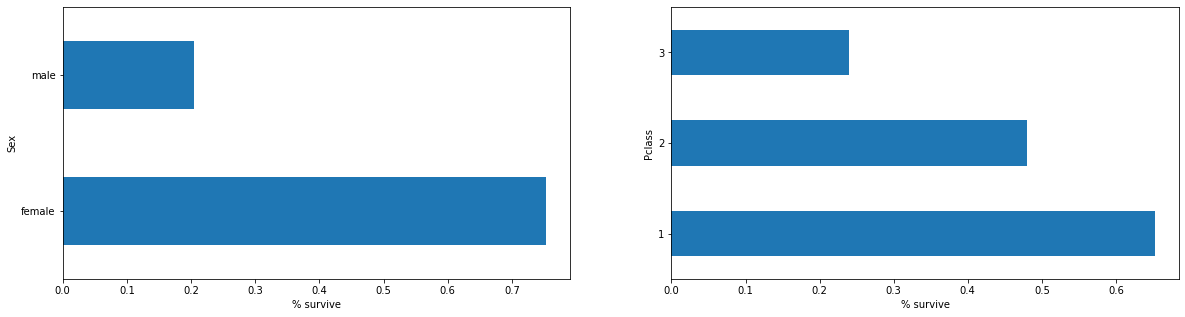

In [0]:
plt.figure(figsize= (20,5))
plt.subplot(1,2,1)
df_titanic.groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.subplot(1,2,2)
df_titanic.groupby('Pclass').Survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()

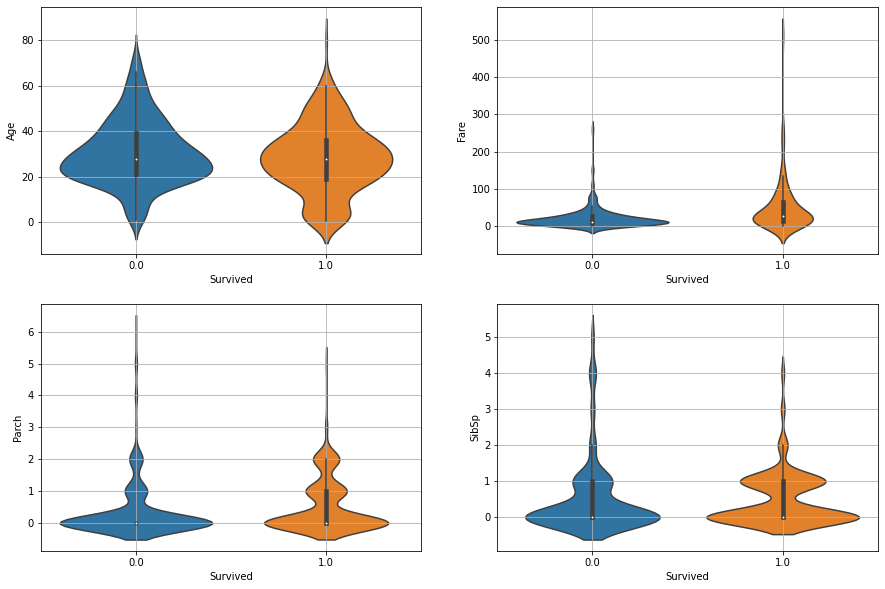

In [0]:
import seaborn as sns

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Survived',y=df_titanic.Age,data=df_titanic)
plt.grid("True")
plt.subplot(2,2,2)
sns.violinplot(x='Survived',y=df_titanic.Fare,data=df_titanic)
plt.grid("True")
plt.subplot(2,2,3)
sns.violinplot(x='Survived',y=df_titanic.Parch,data=df_titanic)
plt.grid("True")
plt.subplot(2,2,4)
sns.violinplot(x='Survived',y=df_titanic.SibSp,data=df_titanic)
plt.grid("True")


plt.show()

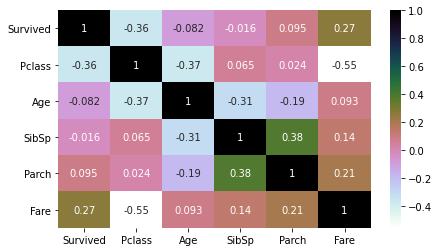

In [0]:
import seaborn as sns

plt.figure(figsize=(7,4))
sns.heatmap(df_titanic.corr(),annot=True,cmap='cubehelix_r')
plt.show()

# **Data Preprocessing**

---





1.   I use the OneHotEncoder to encode several columns into a One-hot vector.
2.   Then i use a StandardScaler to remove the mean and scale the features to unit variance.
1.   Finally i perform a train test split.







In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def onehotencod(df):
    enc = OneHotEncoder()
    se2D = df[:, np.newaxis]
    return enc.fit_transform(se2D).toarray() #fit_transform needs a 2D array 


# One hot encod the target
Y = onehotencod(df_titanic.Survived)
print(se_survied2D[:3,])
print("becoms:")
print(Y[:3,])

[[0.]
 [1.]
 [1.]]
becoms:
[[1. 0.]
 [0. 1.]
 [0. 1.]]


In [0]:
# One hot encod Embarked, Sex, Pclass

onehot_embarked = onehotencod(df_titanic.Embarked)
onehot_sex = onehotencod(df_titanic.Sex)
onehot_pclass = onehotencod(df_titanic.Pclass)

df_embarked = pd.DataFrame(data=onehot_embarked)
df_sex = pd.DataFrame(data=onehot_sex)
df_pclass = pd.DataFrame(data=onehot_pclass)

df_enco = pd.concat([df_embarked,df_sex,df_pclass], axis=1, sort=False)

display(df_titanic[["Sex","Embarked","Pclass" ]].head())
print("becoms:")
display(df_enco.head())

,Sex,Embarked,Pclass
0,male,S,3
1,female,C,1
2,female,S,3
3,female,S,1
4,male,S,3


becoms:


,0,1,2,0,1,0,1,2
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [0]:
df_clean = df_titanic.drop(["Survived","Sex","Embarked","Pclass"], axis=1)
df_clean = df_clean.reset_index()
df_clean = df_clean.drop(["index"], axis=1)
X = pd.concat([df_clean, df_enco], axis=1, sort=False)

In [0]:
scaler = StandardScaler()

display(X.head())
X = scaler.fit_transform(X)
print("becoms:")
X = pd.DataFrame(data=X)
display(X.head())

,Age,SibSp,Parch,Fare,0,1,2,0,1,0,1,2
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


becoms:


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.527669,0.522511,-0.506787,-0.516380,-0.472618,-0.202326,0.534040,-0.756138,0.756138,-0.590326,-0.566538,1.002813
1,0.577094,0.522511,-0.506787,0.694046,2.115874,-0.202326,-1.872519,1.322511,-1.322511,1.693979,-0.566538,-0.997195
2,-0.251478,-0.552714,-0.506787,-0.503620,-0.472618,-0.202326,0.534040,1.322511,-1.322511,-0.590326,-0.566538,1.002813
3,0.369951,0.522511,-0.506787,0.350326,-0.472618,-0.202326,0.534040,1.322511,-1.322511,1.693979,-0.566538,-0.997195
4,0.369951,-0.552714,-0.506787,-0.501257,-0.472618,-0.202326,0.534040,-0.756138,0.756138,-0.590326,-0.566538,1.002813


In [0]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5, random_state=1)

# Build Keras models

---



In [0]:
from tensorflow.keras import  layers, models
from tensorflow import keras
import datetime as dt
import os

def create_model(input_dim, output_dim, nodes, n=1,name='model'):
    # Create model
    model = models.Sequential(name=name)
    for i in range(n):
        model.add(layers.Dense(nodes-i*2, input_dim=input_dim, activation='relu',  kernel_initializer='normal'))
        #model.add(layers.Dropout(.05))
    model.add(layers.Dense(output_dim, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

myModels = []
for i in [2,4,6]:
    myModels.append(create_model(12,2,12,i,"Model_" + str(i)))

myModels[1].summary()

Model: "Model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2504 (Dense)           (None, 12)                156       
_________________________________________________________________
dense_2505 (Dense)           (None, 10)                130       
_________________________________________________________________
dense_2506 (Dense)           (None, 8)                 88        
_________________________________________________________________
dense_2507 (Dense)           (None, 6)                 54        
_________________________________________________________________
dense_2508 (Dense)           (None, 2)                 14        
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________


**Train the Models**

In [0]:
history_list = []

for model in myModels:
    print('Model name:', model.name)
    history = model.fit(X_train, Y_train, batch_size=5, epochs=300, verbose=0, validation_data=(X_test, Y_test))
    history_list.append(history)
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(" ")

Model name: Model_2
Test loss: 0.787792980670929
Test accuracy: 0.7808988690376282
 
Model name: Model_4
Test loss: 0.6928448677062988
Test accuracy: 0.783707857131958
 
Model name: Model_6
Test loss: 0.6725533604621887
Test accuracy: 0.6123595237731934
 


**Plot results**

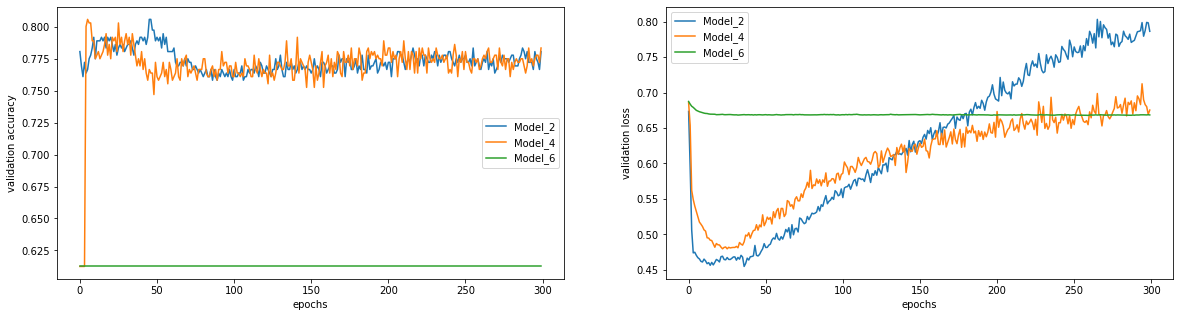

In [0]:

#Plot Accuracy and Loss
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

for i, history in enumerate(history_list):
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    ax1.plot(val_acc, label=myModels[i].name)
    ax2.plot(val_loss, label=myModels[i].name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax1.set_xlabel('epochs')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()